In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import pandas as pd

data = pd.read_csv("framingham.csv").iloc[100:1000]

columns_to_check = ['age','cigsPerDay','totChol']

data_cleaned = data.dropna(subset=columns_to_check)

data = data_cleaned[(data_cleaned[columns_to_check] == 0).any(axis=1)]

data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
101,0,60,3.0,0,0.0,0.0,0,1,0,275.0,141.0,84.0,29.66,75.0,105.0,0
103,0,48,1.0,0,0.0,0.0,0,1,0,265.0,145.0,77.0,24.23,74.0,64.0,0
105,0,63,1.0,0,0.0,0.0,0,0,0,273.0,135.0,82.0,26.76,85.0,56.0,0
106,0,42,4.0,0,0.0,0.0,0,0,0,250.0,115.0,79.0,26.93,65.0,79.0,0
108,0,66,1.0,0,0.0,0.0,0,1,0,278.0,187.0,88.0,40.52,90.0,84.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,0,64,1.0,0,0.0,0.0,0,1,0,205.0,139.0,92.0,32.32,70.0,90.0,0
994,0,46,2.0,0,0.0,0.0,0,0,0,270.0,122.0,76.0,21.35,77.0,88.0,0
997,0,55,3.0,0,0.0,0.0,0,0,0,255.0,125.0,85.0,22.89,65.0,81.0,0
998,0,57,1.0,0,0.0,NaN,0,0,0,372.0,122.0,80.0,21.02,65.0,81.0,0


In [10]:
rawAge = np.array(data["age"])
ageMean = rawAge.mean()
ageStd = rawAge.std()
standardAge = np.array((rawAge-ageMean)/ageStd)
standardAge[np.isnan(standardAge)]=0


male = np.array(data["male"])



rawCigsPerDay = np.array(data["cigsPerDay"])
cigsPerDayMean = rawCigsPerDay.mean()
cigsPerDayStd = rawCigsPerDay.std()
standardCigsPerDay = np.array((rawCigsPerDay-cigsPerDayMean)/(cigsPerDayStd+1))
standardCigsPerDay[np.isnan(standardCigsPerDay)]=0


rawTotChol = np.array(data["totChol"])
totCholMean = rawTotChol.mean()
totCholStd = rawTotChol.std()
standardTotChol = np.array((rawTotChol-totCholMean)/totCholStd)
standardTotChol[np.isnan(standardTotChol)]=0

tenYearCHD = np.array(data["TenYearCHD"])

In [1]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost(x, y, w, b):
    m = x.shape[0]
    predictions = sigmoid(np.dot(x, w) + b)
    return (-1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

def multiGradient(w, b, alp, x, y):
    m = len(x[0])  # Number of training examples
    n_features = len(w)

    dj_dws = np.zeros(n_features)
    for i in range(n_features):
        dj_dws[i] = (1/m) * np.sum(x[i] * (w[i] * x[i] + b - y))

    new_ws = np.zeros(n_features)
    for i in range(n_features):
        new_ws[i] = w[i] - alp * dj_dws[i]

    dj_db = (1/m) * np.sum((np.dot(w, x) + b - y))

    new_b = b - alp * dj_db

    # for i in range(len()):

    return new_ws, new_b

In [3]:
w = np.zeros(x.shape[1])
b = 0

iterations = 100000

ws1 = np.zeros(iterations)
ws2 = np.zeros(iterations)
bs = np.zeros(iterations)
costs = np.zeros(iterations)

for i in range(iterations):
    w,b = multiGradient(circles_X,circles_Y,w,b,0.0001)
    Cost = cost(circles_X,circles_Y,w,b)
    ws1[i] = w[0]
    ws2[i] = w[1]
    bs[i] = b
    costs[i]=Cost
print(w,b)

plt.plot(ws1,costs)
plt.show()
plt.plot(ws2,costs)
plt.show()
plt.plot(bs,costs)
plt.show()



NameError: name 'np' is not defined

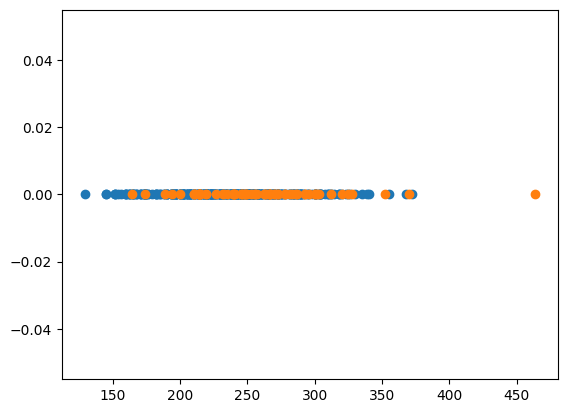

In [13]:
plotDataAge0 = data[data["TenYearCHD"]==0]["age"]
plotDataAge1 = data[data["TenYearCHD"]==1]["age"]
plotDataCigsPerDay0 = data[data["TenYearCHD"]==0]["cigsPerDay"]
plotDataCigsPerDay1 = data[data["TenYearCHD"]==1]["cigsPerDay"]
plotDataTotChol0 = data[data["TenYearCHD"]==0]["totChol"]
plotDataTotChol1 = data[data["TenYearCHD"]==1]["totChol"]
plt.scatter(plotDataTotChol0,plotDataCigsPerDay0)
plt.scatter(plotDataTotChol1,plotDataCigsPerDay1)
plt.plot()
plt.show()

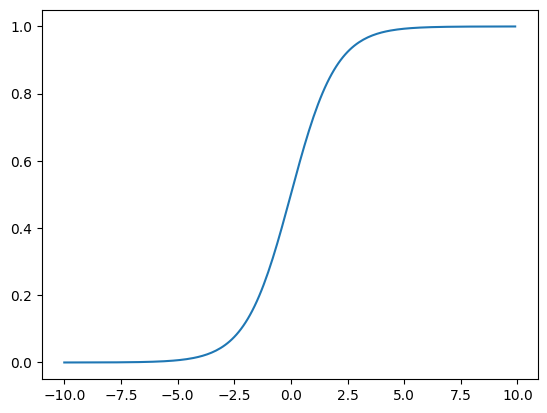

In [14]:
# lol = np.array(sigmoid(z))
plt.plot(np.arange(-10,10,0.1),sigmoid(np.arange(-10,10,0.1)))
plt.show()